# SUCH A DISASTER!!

### Imports

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import re
import string
import numpy as np
import pickle
from IPython.display import display
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import os

import warnings


#downloading
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as m
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Model definitions

In [ ]:
def NBtrain(X_TRAIN,Y_TRAIN):
  clf1 = GaussianNB()
  clf2 = MultinomialNB()
  clf3 = BernoulliNB()
  clf1.fit(X_TRAIN,Y_TRAIN)
  y_pred1_train = clf1.predict(X_TRAIN)
  # print("The train accuracy for GaussianNB ",m.accuracy_score(Y_TRAIN,y_pred1_train))
  # print("-----\n")
  # print("classification report ---> GaussianNB <---- \n",m.classification_report(Y_TRAIN,y_pred1_train))
  clf2.fit(X_TRAIN,Y_TRAIN)
  y_pred2_train = clf2.predict(X_TRAIN)
  # print("The train accuracy for MultinomialNB ",m.accuracy_score(Y_TRAIN,y_pred2_train))
  # print("-----\n")
  # print("classification report ---> MultinomialNB <---- \n",m.classification_report(Y_TRAIN,y_pred2_train))
  clf3.fit(X_TRAIN,Y_TRAIN)
  y_pred3_train = clf3.predict(X_TRAIN)
  # print("The train accuracy for BernoulliNB ",m.accuracy_score(Y_TRAIN,y_pred3_train))
  # print("-----\n")
  # print("classification report ---> BernoulliNB <---- \n",m.classification_report(Y_TRAIN,y_pred3_train))

  return (clf1,clf2,clf3)

def NBtest(clf1,clf2,clf3,X_TEST,Y_TEST=[]):
  warnings.filterwarnings('ignore')
  y_pred1_test = clf1.predict(X_TEST)
  y_pred2_test = clf2.predict(X_TEST)
  y_pred3_test = clf3.predict(X_TEST)
  if(len(Y_TEST) != 0):
    print("-----\n")
    print("The test accuracy accuracy for GaussianNB ",m.accuracy_score(Y_TEST,y_pred1_test))
    print("Classification report ---> GaussianNB <---- \n",m.classification_report(Y_TEST,y_pred1_test))

    print("-----\n")
    print("The test accuracy accuracy for MultinomialNB ",m.accuracy_score(Y_TEST,y_pred2_test))
    print("Classification report ---> MultinomialNB <---- \n",m.classification_report(Y_TEST,y_pred2_test))

    print("-----\n")
    print("The test accuracy accuracy for BernoulliNB ",m.accuracy_score(Y_TEST,y_pred3_test))
    print("Classification report ---> BernoulliNB <----\n",m.classification_report(Y_TEST,y_pred3_test))




  return y_pred1_test,y_pred2_test,y_pred3_test

In [ ]:
def RFtrain(X_TRAIN,Y_TRAIN):
  # Hyperparameter Tuning
  rfc=RandomForestClassifier()
  params={'n_estimators':[50,100,150,200],
        'criterion':['gini','entropy'],
        "max_depth":[2,4,8,10],
        "min_samples_leaf":[2,4,7,10]}
  gs=GridSearchCV(rfc,param_grid=params,cv=10,n_jobs=-1,return_train_score=True)
  model = gs.fit(X_TRAIN,Y_TRAIN)
  cf=pd.DataFrame(gs.cv_results_)
  print("The best estimator ",gs.best_estimator_)
  print("Best paramters ",gs.best_params_)
  rfc=RandomForestClassifier(**gs.best_params_)
  rfc.fit(X_TRAIN,Y_TRAIN)
  y_pred1_train = rfc.predict(X_TRAIN)
  # print("The train accuracy ",m.accuracy_score(Y_TRAIN,y_pred1_train))
  # print("classification report for TRAIN \n",m.classification_report(Y_TRAIN,y_pred1_train))

  return model

def RFtest(rfc,X_TEST,Y_TEST=[]):
  y_pred_test = rfc.predict(X_TEST)
  if(len(Y_TEST) != 0):
    print("-----\n")
    print("The test accuracy accuracy for Random Forest ",m.accuracy_score(Y_TEST,y_pred_test))
    print("Classification report ---> Random Forest <---- \n",m.classification_report(Y_TEST,y_pred_test))

  return y_pred_test

In [ ]:
def Dtrain(X_train,Y_TRAIN):
  DT_model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 41, min_samples_split = 112)
  DT_model.fit(X_train,Y_TRAIN)
  # tree.plot_tree(DT_model,
  #                  feature_names=iris.feature_names,
  #                  class_names=iris.target_names,
  #                  filled=True)
  return DT_model

def Dtest(DT_model,X_test,Y_TEST = []):
  Y_pred  = DT_model.predict(X_test)
  if(len(Y_TEST) != 0):
    results = confusion_matrix(Y_TEST, Y_pred)
    print("-----\n")
    print("The test accuracy accuracy for Decision  Tree ",m.accuracy_score(Y_TEST,Y_pred))
    print("Classification report ---> Decision  Tree <---- \n",m.classification_report(Y_TEST,Y_pred))

  return Y_pred

In [ ]:
def Ktrain(X_train,Y_TRAIN):
  KNN_model = KNeighborsClassifier(n_neighbors=48,metric = "manhattan",p=1)
  KNN_model.fit(X_train, Y_TRAIN)

  return KNN_model

def Ktest(KNN_model,X_test,Y_TEST = []):
  Y_pred = KNN_model.predict(X_test)
  if(len(Y_TEST) != 0):
    results = confusion_matrix(Y_TEST, Y_pred)
    print("-----\n")
    print("The test accuracy accuracy for KNN ",m.accuracy_score(Y_TEST,Y_pred))
    print("Classification report ---> K Nearest Neighbour <---- \n",m.classification_report(Y_TEST,Y_pred))

  return Y_pred

### Setting up modifier and text preprocessing functions
**[ RUN FOR TESTING ]**

In [ ]:
# variable declarations
maxlen=24

replace_collocations = {
    "aren't": "are not",
    "can't": "cannot",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "here's": "here is",
    "isn't": "is not",
    "it's": "it is",
    "i'm": "i am",
    "i've": "i have",
    "it'll": "it will",
    "it'd": "it would",
    "i'd": "i would",
    "i'll": "i will",
    "mightn't": "might not",
    "mustn't": "must not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "shouldn't": "should not",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "there's": "there has",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "weren't": "were not",
    "won't": "will not",
    "wouldn't": "would not",
    "what's": "what is",
    "you're": "you are",
    "you'll": "you will",
    "you'd": "you would",
}

replace_collocations_with_errors={}
for word, changed_word in replace_collocations.items():
    replace_collocations_with_errors[word.replace("'","")]=changed_word

replace_abbreviations = {
    "ave": "avenue",
    "hwy": "highway",
    "intl": "international",
    "st": "saint",
    "u": "you",
    "stats": "statistics",
    "pkwy": "parkway",
    "av": "autonomous vehicle",
    "conf": "confirm",
    "rd": "road",
    "dr": "doctor",
    "wtf": "what the fuck",
    "mf": "motherfucker",
    "omg": "oh my god",
    "rip": "rest in peace",
    "esp": "especially",
    "ok": "okay",
    "ny": "new york",
    "bc": "because",
    "bcz": "because",
    "sr": "senior",
    "vs": "versus",
    "wht": "what",
    "us'g": "using",
    "s3x": "sex",
    "rn": "right now",

}

replace_word_symbols = {
    "&amp": "&",
    "&gt": ">",
    "ÛÒ": "",
    "åÊ": "",
    "Û÷": "",
    "ÛÓ": "",
    "Û_": "",
    "Û": "",
    "å£": "",
    "å": "",
    "á": "",
    "å": "",
    "á": "",
    "å": "",
    "á": "",
    "Ì": "",
    "¢": "",
    "Û¼": "",
    "&lt": "<",
    "ÛÏ": "",
    "Û": "",
}

In [ ]:
def check(val):
  if val==1:
    return "Yes"
  return "No"

In [ ]:
def cleaner_func(text):
  '''
  apply the following transformations:
  1. to lowercase
  2. replace wrong symbols
  3. html links
  4. email ids
  5. emoticons
  6. dates
  7. usernames
  8. ip addresses
  9. symbols
  10. replace words with full forms
  11. newlines
  12. double/extra spaces
  text: string on which we need to apply the changes
  '''
  #changing all characters to lowercase
  text=str.lower(text)

  #remove some necessary text ASCII characters
  for val,re_val in replace_word_symbols.items():
    text=re.sub(val,re_val,text)

  #remove html links (also includes: http://www.amazon.co.jp/エレクトロニクス-デジタルカメラ-ポータブルオーディオ/b/ref=topnav_storetab_e?ie=UTF8&node=3210981)
  no_html=r'http[s]?://(?:[\w]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9\w][0-9\w]))+'

  #remove e-mail ids (https://stackoverflow.com/questions/2049502/what-characters-are-allowed-in-an-email-address): (also includes: mason@日本.com)
  no_emails=r"[\w0-9!#$%.(),:;<>@[\]&'\"*+-/=?^_`{|}~]+@[\w0-9_]+\.[\w0-9]+"

  #remove emoticons
  no_emoticons='[\U00010000-\U0010ffff]'

  #remove dates
  no_dates='\b(0[1-9]|1[0-2])[-/](0[1-9]|[12]\d|3[01])[-/](\d\d)\b'

  #removing entire profile names as otherwise the profiles will be used for classification as well!! (twitter does not want to!!)
  no_names='@[\w]+'

  #remove ip addresses
  no_ip='d{1,3}.d{1,3}.d{1,3}.d{1,3}'

  #substitute
  lists_of_changes=[no_html, no_emails, no_emoticons, no_dates, no_names, no_ip]
  for val in lists_of_changes:
    text=re.sub(val,'',text)

  #replacements
  replacement_changes=[replace_collocations, replace_abbreviations, replace_collocations_with_errors]
  for change_type in replacement_changes:
    for txt,re_txt in change_type.items():
      text=re.sub(r"\b"+txt+r"\b",re_txt,text)

  #removing all punctuation marks and symbols
  no_symbols='[^a-zA-Z0-9 \n]'
  text=re.sub(no_symbols,'',text)

  #replace nextlines by a space
  text=re.sub('[\n]+',' ',text)

  #replace double or more spaces with a single space
  text=re.sub('[ ]{2,}',' ',text)

  return text

In [ ]:
def generate_word_cloud(text, save_path, title):
  '''
  generate a wordcloud for the provided data.
  text        :list/array of strings
  save_path   :the location to store teh image in
  title       :the name of the image as well as the title
  '''
  vectorizer=CountVectorizer()
  X=vectorizer.fit_transform(text)
  words=vectorizer.get_feature_names_out()
  word_counts=X.sum(axis=0).A1 #get the column sum of each word and then flatten it into a row array
  word_freq = dict(zip(words, word_counts))

  # generate word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

  # display wordcloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(title)
  plt.savefig(os.path.join(save_path, title), bbox_inches='tight', pad_inches=0)
  plt.show()


In [ ]:
def transform_text(text):
  punc = list(string.punctuation)
  stop_word = stopwords.words("english")
  Lemmatize = WordNetLemmatizer()

  new_text = " ".join([Lemmatize.lemmatize(word) for word in word_tokenize(text) if ((word not in punc) and (word not in stop_word))])

  return new_text

In [ ]:
def prior(df, is_train=False):
  '''
  Preprocess the data, for both train and test data, as and when accordingly sent
  Display train wordclouds only, not for test
  '''
  global maxlen

  if is_train == True:
    Y_Train=df['target']

  #dropping some unnecessary columns
  dropped_df=df.drop(['id','keyword','location'],axis=1)
  dropped_df

  #apply changes
  changed_df=dropped_df
  changed_df['text']=dropped_df['text'].apply(cleaner_func)

  from nltk.corpus import stopwords
  cleaned=[]
  for text in changed_df['text']:
    temp=' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    cleaned.append(temp)

  return cleaned


In [ ]:
def preprocess(df, is_train=False):
  '''
  Preprocess the data, for both train and test data, as and when accordingly sent
  Display train wordclouds only, not for test
  '''
  global maxlen

  if is_train == True:
    Y_Train=df['target']

  #dropping some unnecessary columns
  dropped_df=df.drop(['id','keyword','location'],axis=1)
  dropped_df

  if is_train == True:
    generate_word_cloud(dropped_df['text'],'/content/drive/MyDrive/Disaster Tweet Classification/images','WordCloud before cleaning')

  #apply changes
  changed_df=dropped_df
  changed_df['text']=dropped_df['text'].apply(cleaner_func)

  if is_train == True:
    generate_word_cloud(changed_df['text'],'/content/drive/MyDrive/Disaster Tweet Classification/images','WordCloud after cleaning')

  #apply lemmatization and stopword removal
  lemme_df=changed_df
  lemme_df['text']=changed_df['text'].apply(transform_text)

  if is_train == True:
    generate_word_cloud(lemme_df['text'],'/content/drive/MyDrive/Disaster Tweet Classification/images','WordCloud after lemmatization and stopword removal')
    generate_word_cloud([e for i, e in enumerate(lemme_df['text']) if Y_Train[i] == 1],'/content/drive/MyDrive/Disaster Tweet Classification/images','Word Cloud for Positive Label')
    generate_word_cloud([e for i, e in enumerate(lemme_df['text']) if Y_Train[i] == 0],'/content/drive/MyDrive/Disaster Tweet Classification/images','Word Cloud for Negative Label')

  # Tokenization
  tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
  tokenizer.fit_on_texts(lemme_df['text'])
  word_index = tokenizer.word_index

  # Encode training data sentences into sequences
  data_sequences = tokenizer.texts_to_sequences(lemme_df['text'])

  # Get max training sequence length
  if is_train == True:
    maxlen = max([len(x) for x in data_sequences])

  # Padding_Sequences
  data_padding = pad_sequences(data_sequences, padding="pre", truncating="pre", maxlen=maxlen)
  data_padding

  # Conversion into array
  preprocessed_data = np.array(data_padding)

  return preprocessed_data, word_index

### Setting up training data
**[ no need to run for testing!! ]**

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Disaster Tweet Classification/train.csv')

In [ ]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
# shuffle the order of rows in the dataset
train_df = train_df.sample(frac=1)

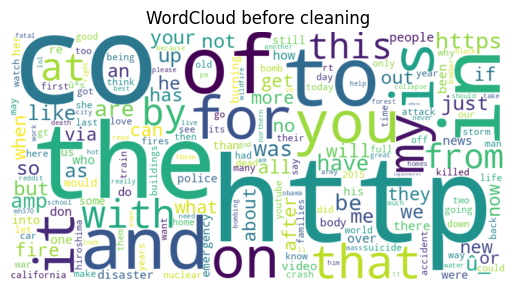

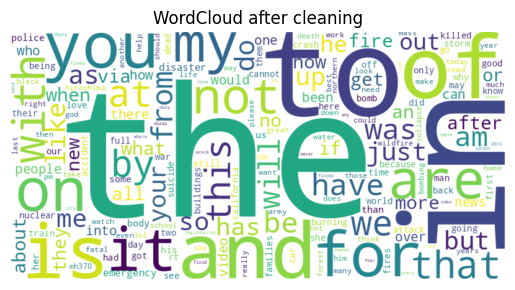

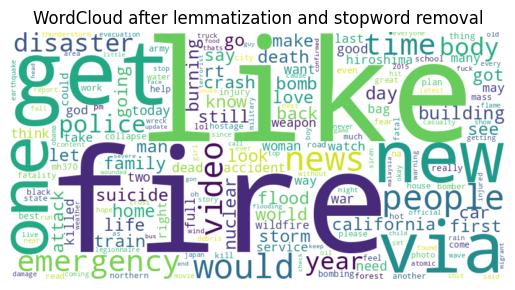

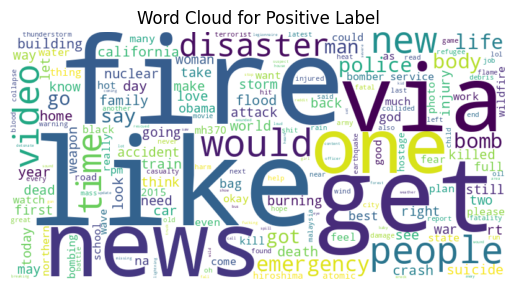

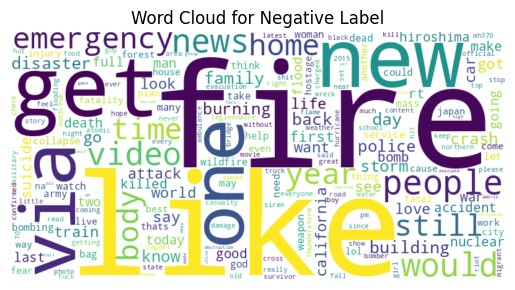

In [ ]:
X_Train,wc=preprocess(train_df,True)
Y_Train=np.array(train_df['target'])

Comparison

In [ ]:
compare_df = pd.DataFrame(list(zip(train_df['text'],prior(train_df,True))), columns=['Before Cleaning','After Cleaning'])
compare_df

,Before Cleaning,After Cleaning
0,Malik Saadthe best police officer produced by ...,malik saadthe best police officer produced kpd...
1,On the freeway to Africa til I wrecked my Audi,freeway africa til wrecked audi
2,@ScriptetteSar @katiecool447 btw the 30th is a...,btw 30th actually next year casualty began 6th...
3,11-Year-Old Boy Charged With Manslaughter of T...,11yearold boy charged manslaughter toddler rep...
4,10 Ways To Survive and Escape Martial Law | Wo...,10 ways survive escape martial law world
...,...,...
7608,Long Road To Ruin - Foo Fighters,long road ruin foo fighters
7609,@anellatulip and put the taint there and that ...,put taint magisters open gates let blight get ...
7610,Uribe demolished that ball ??????,uribe demolished ball
7611,Cyclone Komen devastates families in Myanmar t...,cyclone komen devastates families myanmar week...


### Save the training data in pickle
**[ no need to run for testing!! ]**

In [ ]:
file_path_X = '/content/drive/MyDrive/Disaster Tweet Classification/Saved variables/X_data.pickle'
file_path_Y = '/content/drive/MyDrive/Disaster Tweet Classification/Saved variables/Y_data.pickle'
file_path_XY = '/content/drive/MyDrive/Disaster Tweet Classification/Saved variables/Actual_data.pickle'

# Open the file in binary mode
with open(file_path_X, 'wb') as file:
    # Serialize and write the variable to the file
    pickle.dump(X_Train, file)


# Open the file in binary mode
with open(file_path_Y, 'wb') as file:
    # Serialize and write the variable to the file
    pickle.dump(Y_Train, file)

# Open the file in binary mode
with open(file_path_XY, 'wb') as file:
    # Serialize and write the variable to the file
    pickle.dump(train_df['text'], file)

### Setting the testing data
**[ RUN FOR TESTING DATA LIST ]**

In [ ]:
file_path_X = '/content/drive/MyDrive/Disaster Tweet Classification/Saved variables/X_data.pickle'
file_path_Y = '/content/drive/MyDrive/Disaster Tweet Classification/Saved variables/Y_data.pickle'
file_path_XY = '/content/drive/MyDrive/Disaster Tweet Classification/Saved variables/Actual_data.pickle'

X_Train=pickle.load(open(file_path_X, 'rb'))
Y_Train=pickle.load(open(file_path_Y, 'rb'))
train_df=pickle.load(open(file_path_XY, 'rb'))

tweet_dict={}
for i in range(len(X_Train)):
  tweet_dict[tuple(X_Train[i])]=train_df[i]

### Everything about the models
**[ RUN FOR TESTING ]**

In [ ]:
path='/content/drive/MyDrive/Disaster Tweet Classification/saved models/'
file1 = path+'finalized_DTree.sav'
file2 = path+'finalized_KNN.sav'
file3 = path+'finalized_RF.sav'
file4 = path+'finalized_GaussianNB.sav'
file5 = path+'finalized_MultinomialNB.sav'
file6 = path+'finalized_BernoulliNB.sav'

### For Training only
**[ no need to run for testing!! ]**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_Train, test_size=0.2, random_state=42)

In [ ]:
modelGaussianNB,modelMultinomialNB,modelBernoulliNB=NBtrain(X_Train,Y_Train)

In [ ]:
model_KNN=Ktrain(X_Train, Y_Train)

In [ ]:
model_DTree=Dtrain(X_Train, Y_Train)

In [ ]:
modelRF=RFtrain(X_Train,Y_Train)

The best estimator  RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=150)
Best paramters  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 150}


show graphs obtained

--- K Nearest Neighbour ---




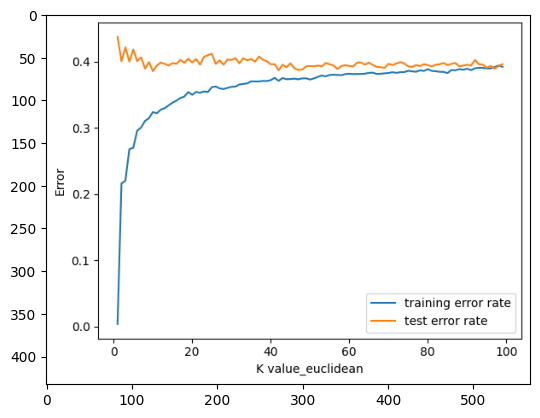

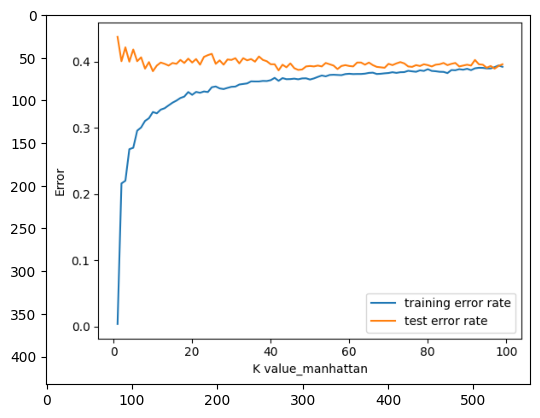

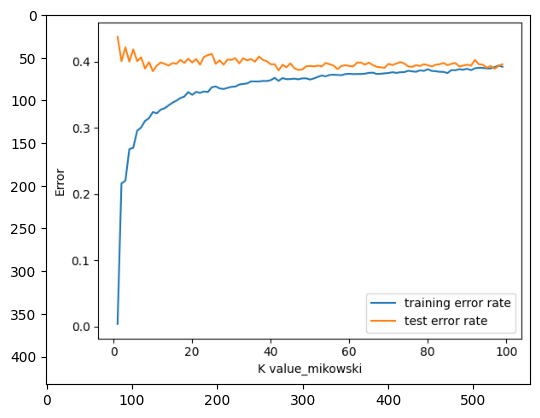

In [ ]:
print("--- K Nearest Neighbour ---\n\n")
image = mpimg.imread("/content/drive/MyDrive/Disaster Tweet Classification/images/EUCLIDEAN.png")
plt.imshow(image)
plt.show()
print()

image = mpimg.imread("/content/drive/MyDrive/Disaster Tweet Classification/images/manhattan.png")
plt.imshow(image)
plt.show()
print()
image = mpimg.imread("/content/drive/MyDrive/Disaster Tweet Classification/images/mikowski.png")
plt.imshow(image)
plt.show()

--- Decision Tree ---




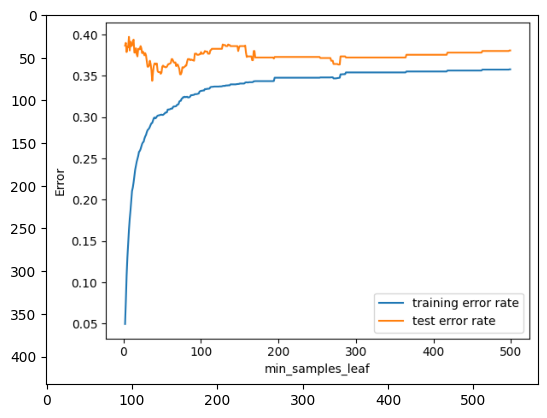

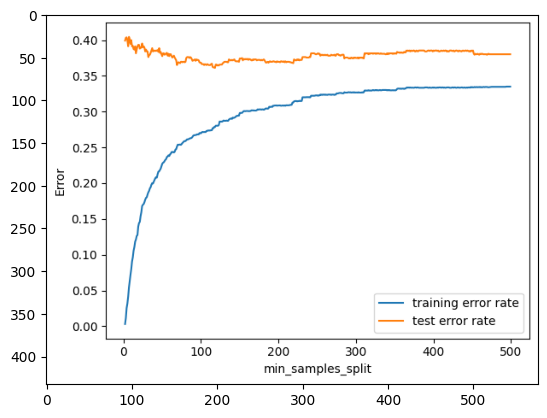

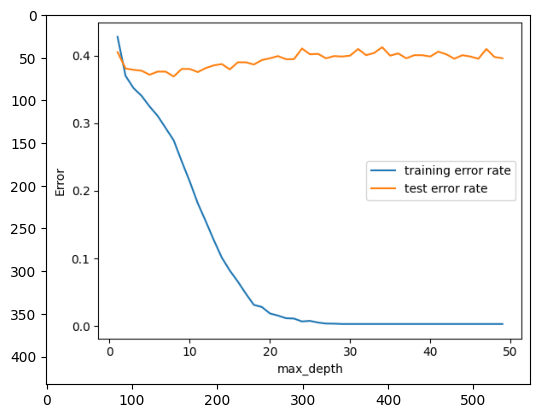

In [ ]:
# dtree1 = Image.open("/content/drive/MyDrive/Disaster Tweet Classification/images/dtree1.png")
print("--- Decision Tree ---\n\n")
image = mpimg.imread("/content/drive/MyDrive/Disaster Tweet Classification/images/dtree1.png")
plt.imshow(image)
plt.show()
print()

image = mpimg.imread("/content/drive/MyDrive/Disaster Tweet Classification/images/dtree2.png")
plt.imshow(image)
plt.show()
print()
image = mpimg.imread("/content/drive/MyDrive/Disaster Tweet Classification/images/dtree3.png")
plt.imshow(image)
plt.show()

In [ ]:
# saving the models
pickle.dump(model_DTree, open(file1, 'wb'))
pickle.dump(model_KNN, open(file2, 'wb'))
pickle.dump(modelRF, open(file3, 'wb'))
pickle.dump(modelGaussianNB, open(file4, 'wb'))
pickle.dump(modelMultinomialNB, open(file5, 'wb'))
pickle.dump(modelBernoulliNB, open(file6, 'wb'))

### Model loading
**[ RUN FOR TESTING ]**

In [ ]:
# load the saved models
loaded_model_DTree = pickle.load(open(file1, 'rb'))
loaded_model_KNN = pickle.load(open(file2, 'rb'))
loaded_model_RF = pickle.load(open(file3, 'rb'))
loaded_model_G_NB = pickle.load(open(file4, 'rb'))
loaded_model_M_NB = pickle.load(open(file5, 'rb'))
loaded_model_B_NB = pickle.load(open(file6, 'rb'))

## Choose Testing type
**[ RUN FOR TESTING ]**

### For only one data input

In [ ]:
tweet = input('Enter the tweet you want to classify: ')
Xtest = pd.DataFrame([[1,'null','null',tweet,-1]], columns = ['id','keyword','location','text','target'])

Y_test=[]
X_test, wc = preprocess(Xtest,Y_test)

Enter the tweet you want to classify: It is a very beautiful day today


In [ ]:
X_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        3, 4]], dtype=int32)

### For an entire list of data inputs

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_Train, test_size=0.2, random_state=42)

In [ ]:
# test_df = pd.read_csv('/content/drive/MyDrive/Disaster Tweet Classification/test.csv') #testing data

Pickling data

In [ ]:
# org='/content/drive/MyDrive/Disaster Tweet Classification/Saved variables/'
# vars=[X_train,Y_train, X_test, Y_test]
# paths=[org+"X_Train.pickle",org+"Y_Train.pickle",org+" X_Test.pickle",org+"Y_Test.pickle"]
# for i in range(len(paths)):
#   with open(paths[i], 'wb') as file:
#     # Serialize and write the variable to the file
#     pickle.dump(vars[i], file)

In [ ]:
# with open("/content/drive/MyDrive/Disaster Tweet Classification/Saved variables/X_test.pickle", 'wb') as file:
#     # Serialize and write the variable to the file
#     pickle.dump(X_Test, file)

## Prediction

In [ ]:
pred_G_NB,pred_M_NB,pred_B_NB = NBtest(loaded_model_G_NB,loaded_model_M_NB,loaded_model_B_NB,X_test,Y_test)
pred_KNN = Ktest(loaded_model_KNN,X_test,Y_test)
pred_Dtree = Dtest(loaded_model_DTree,X_test,Y_test)
pred_RF = RFtest(loaded_model_RF,X_test,Y_test)

-----

The test accuracy accuracy for GaussianNB  0.4274458305975049
Classification report ---> GaussianNB <---- 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       873
           1       0.43      1.00      0.60       650

    accuracy                           0.43      1523
   macro avg       0.71      0.50      0.30      1523
weighted avg       0.76      0.43      0.26      1523

-----

The test accuracy accuracy for MultinomialNB  0.5508864084044649
Classification report ---> MultinomialNB <---- 
               precision    recall  f1-score   support

           0       0.62      0.56      0.59       873
           1       0.48      0.54      0.51       650

    accuracy                           0.55      1523
   macro avg       0.55      0.55      0.55      1523
weighted avg       0.56      0.55      0.55      1523

-----

The test accuracy accuracy for BernoulliNB  0.5344714379514117
Classification report ---> BernoulliNB <

In [ ]:
if len(pred_RF) == 1:
  display(pd.DataFrame([[tweet,check(pred_G_NB),check(pred_M_NB),check(pred_B_NB),check(pred_KNN),check(pred_Dtree),check(pred_RF)]],columns=['Input Text','Gaussian_NB','Multinomial_NB','BernoulliNB','KNN','Decision  Tree','Random Forest']))
else:
  res_dict={}
  X=[]
  Y1=[]
  Y2=[]
  Y3=[]
  for i in range(len(X_test)):
    X.append(tweet_dict[tuple(X_test[i])])
    Y1.append(check(pred_G_NB[i]))
    Y2.append(check(pred_KNN[i]))
    Y3.append(check(pred_RF[i]))
  res_dict={
      "Tweet": X,
      "G_NB": Y1,
      "KNN": Y2,
      "RF": Y3
      }
  display(pd.DataFrame(res_dict))

,Tweet,G_NB,KNN,RF
0,So you have a new weapon that can cause un-ima...,Yes,No,No
1,Islamic State group in Egypt threatens to kill...,Yes,No,Yes
2,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,Yes,No,No
3,Aftershock back to school kick off was great. ...,Yes,No,No
4,in response to trauma Children of Addicts deve...,Yes,No,No
...,...,...,...,...
1518,@SmusX16475 Skype just crashed u host,Yes,Yes,No
1519,Christian Attacked by Muslims at the Temple Mo...,Yes,No,No
1520,Man charged over fatal crash near Dubbo refuse...,Yes,No,No
1521,#usNWSgov Severe Weather Statement issued Augu...,Yes,No,No
